In [1]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from fe_gmx import AWH_Ensemble, AWH_2D_Ensemble

## Load the AWH ensemble trajectories

In [2]:
awh_ensemble = AWH_2D_Ensemble('./data/AWH',
                               regenerate_awh=True)

                        :-) GROMACS - gmx awh, 2023 (-:

Executable:   /opt/tcbsys/gromacs/2023/gmx/AVX2_256/bin/gmx
Data prefix:  /opt/tcbsys/gromacs/2023/gmx/AVX2_256
Working dir:  /nethome/yzhuang/git_repo/binding-free-energy-with-gromacs/examples/data/AWH/awh_result
Command line:
  gmx awh -f ../rep1/awh.edr -o awh.xvg -s ../rep1/awh.tpr -skip 10 -more

Opened ../rep1/awh.edr as single precision energy file
Reading file ../rep1/awh.tpr, VERSION 2023 (single precision)
Last energy frame read 1666 time 166563.000         

GROMACS reminds you: "I Don't Like Dirt" (The Breeders)



Found 84 awh_pmf files.
The latest awh_pmf file is ./data/AWH/awh_result/awh_t166000.xvg
The latest awh_pmf file was generated at 2023-06-30 12:18:25.941841
Found 4 walkers.
The latest walker was generated at 2023-06-30 12:14:59.197702
Generating pulling data...
Generating log data...
Generating PMF data...


Generating PMF data: 100%|██████████| 84/84 [00:01<00:00, 79.25it/s]


## Plot the last results of the AWH ensemble

In [3]:
time = awh_ensemble.awh_results.timeseries[-1]
awh_pmf = awh_ensemble.awh_results.pmf[-1]

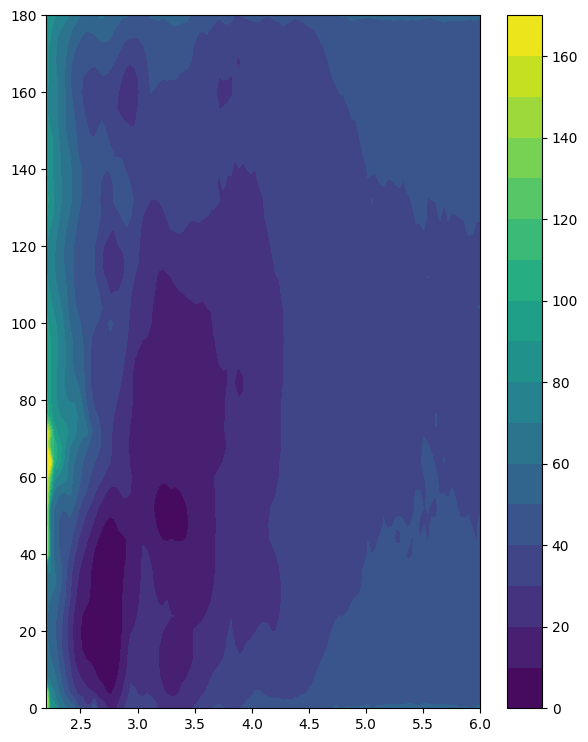

In [4]:
awh_cv1 = awh_pmf.T[0][0]
awh_cv2 = awh_pmf[0].T[1]
awh_fes = awh_pmf[:,:,2].T

fig, ax = plt.subplots(figsize=(7,9))
mappable = ax.contourf(
            awh_cv1,
            awh_cv2,
            awh_fes,
#                vmax=100,
            levels=20)
plt.colorbar(mappable)

## Plot the pulling files of the AWH ensemble

<Axes: xlabel='dim_1', ylabel='dim_2'>

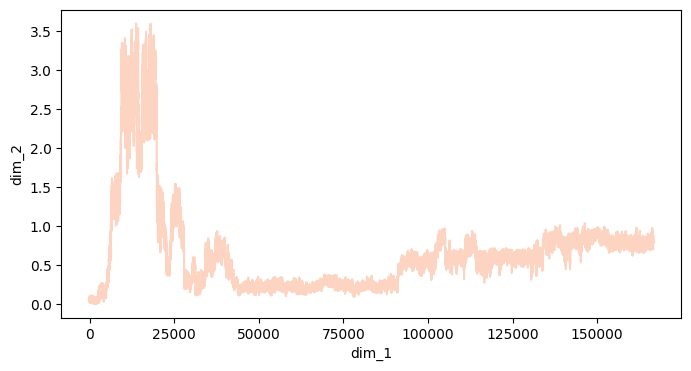

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('Reds', n_colors=5)
fig, ax = plt.subplots(figsize=(8,4))

sns.lineplot(x='dim_1', y='dim_2', data=awh_ensemble.awh_pullx[0].data)